In [6]:
import numpy as np
import pandas as pd
import scipy as sp

In [7]:
print("Hello world")

Hello world


In [8]:
df = pd.read_csv('./cal_housing_prices.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [12]:
# dfx = df.copy(deep = 1)

df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace = True)
df.isnull().sum()

/tmp/ipykernel_4830/3323306409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace = True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
catData = set()
for feature in df:
    if(df[feature].dtype == object):
        catData.add(feature)
catData

{'ocean_proximity'}

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['ocean_proximity'])
vals = le.transform(df['ocean_proximity'])
vals

array([3, 3, 3, ..., 1, 1, 1])

In [16]:
from collections import Counter
x = Counter(df['ocean_proximity'])
xaxis = list(x.keys())
yaxis = np.array(list(x.values()))
yaxis

array([2290, 9136, 6551, 2658,    5])

([<matplotlib.patches.Wedge at 0x7effafa5a710>,
 [Text(1.0338526301896085, 0.37569766974261204, 'NEAR BAY'),
  Text(-0.5436077734792168, 0.9562900128167023, '<1H OCEAN'),
  Text(-0.2582548731878912, -1.069254142135866, 'INLAND'),
  Text(1.010538122168702, -0.43452583771710707, 'NEAR OCEAN'),
  Text(1.0999996814845978, -0.0008370984311453185, 'ISLAND')])

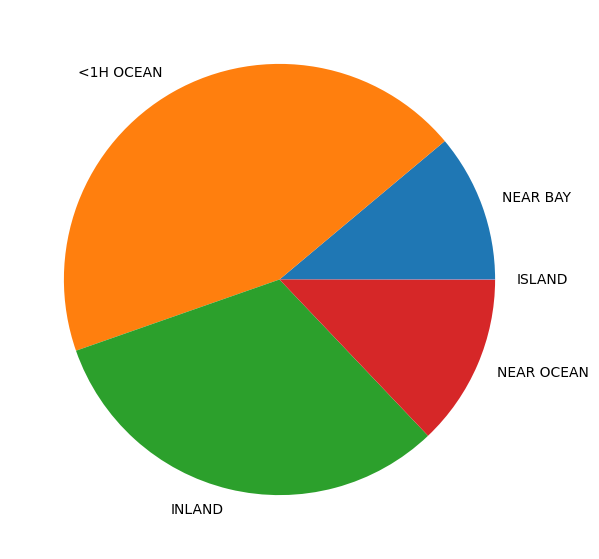

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (10, 7))

plt.pie(yaxis, labels = xaxis)

In [18]:
df2 = df.copy(deep = True)

df2['ocean_proximity'] = vals
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [19]:
import sklearn.preprocessing
?sklearn.preprocessing.OrdinalEncoder

Init signature:
sklearn.preprocessing.OrdinalEncoder(
    *,
    categories='auto',
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    unknown_value=None,
    encoded_missing_value=nan,
    min_frequency=None,
    max_categories=None,
)
Docstring:     
Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are converted to ordinal integers. This results in
a single column of integers (0 to n_categories - 1) per feature.

Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
For a comparison of different encoders, refer to:
:ref:`sphx_glr_auto_examples_preprocessing_plot_target_encoder.py`.

.. versionadded:: 0.20

Parameters
----------
categories : 'auto' or a list of array-like, default='auto'
    Categories (unique values) per feature:

    - 'auto' : Determine categories automatically from the traini

In [20]:
features = []
target = df2['median_house_value']

for row in df2:
    if row != 'median_house_value':
        if(not len(features)):
            features = np.array(df2[row])
        else:
            features = np.column_stack((features, df2[row]))

features.size
target.size

20640

In [21]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(features, target)

StandardScaler()

In [22]:
X = stdsc.transform(features)
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [23]:
df2.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049454
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity       0.081750
Name: median_house_value, dtype: float64

<Axes: >

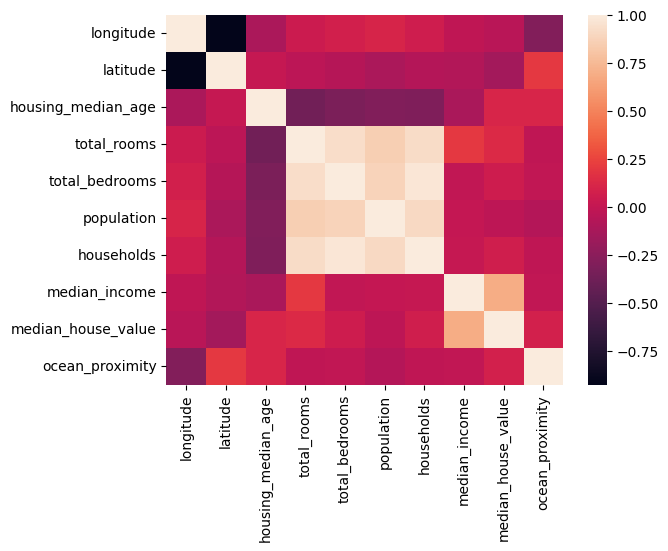

In [24]:
import seaborn as sns

sns.heatmap(df2.corr())

In [25]:
import imblearn
help(imblearn)

Help on package imblearn:

NAME
    imblearn - Toolbox for imbalanced dataset in machine learning.

DESCRIPTION
    ``imbalanced-learn`` is a set of python methods to deal with imbalanced
    datset in machine learning and pattern recognition.
    
    Subpackages
    -----------
    combine
        Module which provides methods based on over-sampling and under-sampling.
    ensemble
        Module which provides methods generating an ensemble of
        under-sampled subsets.
    exceptions
        Module including custom warnings and error clases used across
        imbalanced-learn.
    keras
        Module which provides custom generator, layers for deep learning using
        keras.
    metrics
        Module which provides metrics to quantified the classification performance
        with imbalanced dataset.
    over_sampling
        Module which provides methods to over-sample a dataset.
    tensorflow
        Module which provides custom generator, layers for deep learning using